41/41 [==============================] - 19s 432ms/step
Accuracy: 97.41%
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


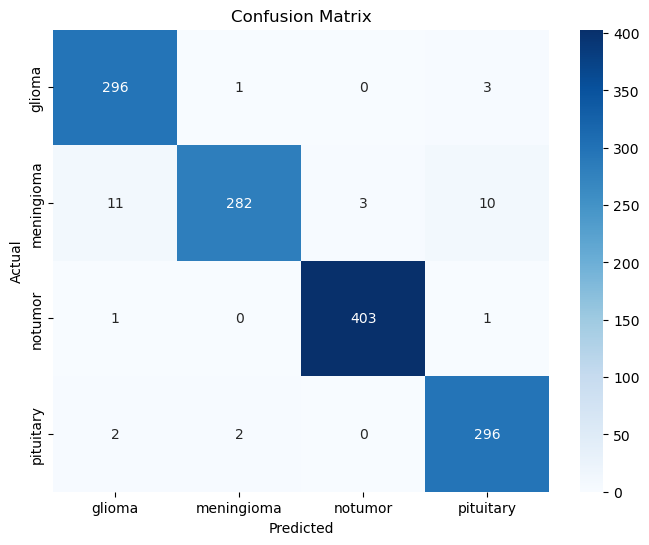

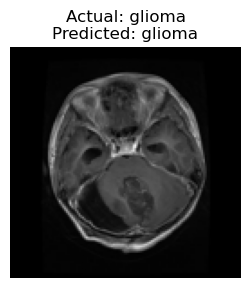

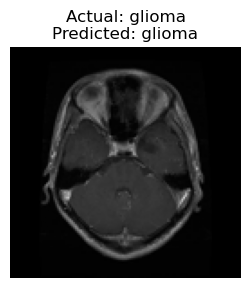

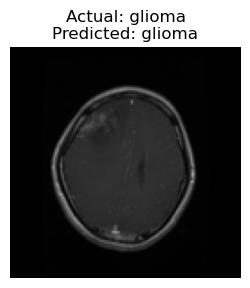

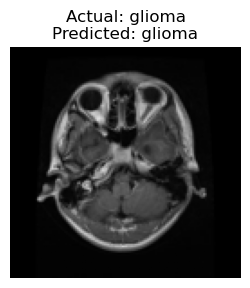

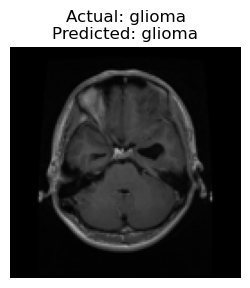

In [4]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = load_model('models/resnet50.h5')
test_path = "testing"
categories = ["glioma", "meningioma", "notumor", "pituitary"]
category_to_label = {cat: i for i, cat in enumerate(categories)}
label_mapping = {i: cat for i, cat in enumerate(categories)}
test_images, test_labels = [], []

for category in categories:
    category_folder = os.path.join(test_path, category)
    label = category_to_label[category]

    if not os.access(category_folder, os.R_OK):
        print(f"Permission denied or inaccessible directory: {category_folder}")
        continue

    for filename in os.listdir(category_folder):
        img_path = os.path.join(category_folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize((128, 128))
            img_array = np.array(img, dtype=np.float32) / 255.0
            test_images.append(img_array)
            test_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
test_images = np.array(test_images)
test_labels = np.array(test_labels)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
num_images = 5
for i, img in enumerate(test_images[:num_images]):
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f"Actual: {label_mapping[test_labels[i]]}\nPredicted: {label_mapping[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()


41/41 [==============================] - 1s 22ms/step
Accuracy: 94.43%
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


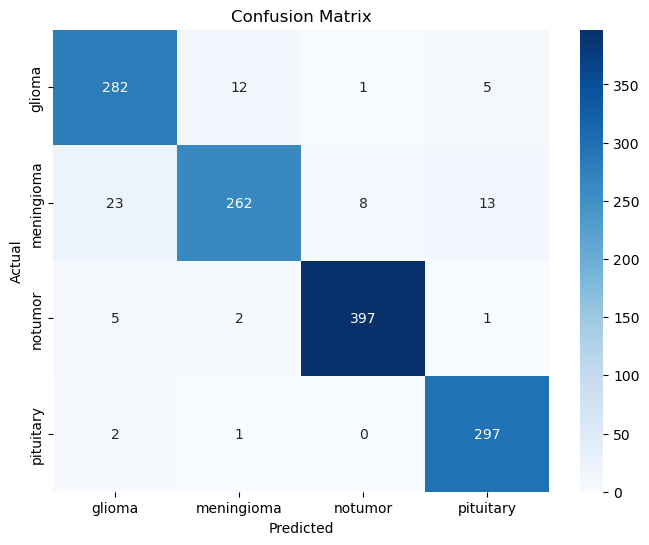

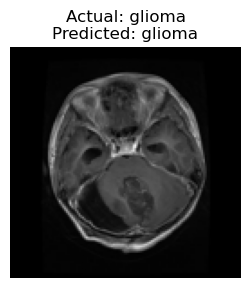

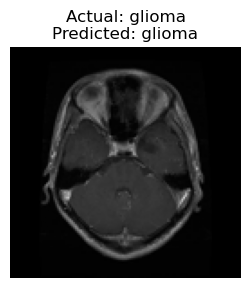

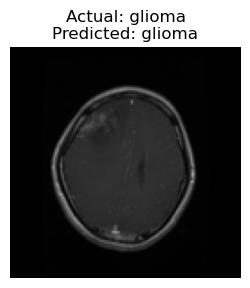

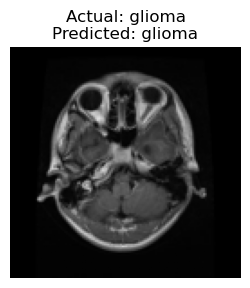

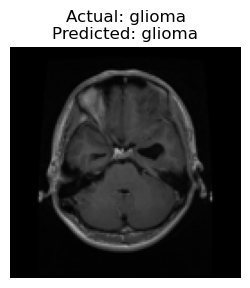

In [5]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
model = load_model('models/Alexenet.h5')
test_path = "testing"
categories = ["glioma", "meningioma", "notumor", "pituitary"]
category_to_label = {cat: i for i, cat in enumerate(categories)}
label_mapping = {i: cat for i, cat in enumerate(categories)}
test_images, test_labels = [], []

for category in categories:
    category_folder = os.path.join(test_path, category)
    label = category_to_label[category]

    if not os.access(category_folder, os.R_OK):
        print(f"Permission denied or inaccessible directory: {category_folder}")
        continue

    for filename in os.listdir(category_folder):
        img_path = os.path.join(category_folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize((128, 128))
            img_array = np.array(img, dtype=np.float32) / 255.0
            test_images.append(img_array)
            test_labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
test_images = np.array(test_images)
test_labels = np.array(test_labels)
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
num_images = 5
for i, img in enumerate(test_images[:num_images]):
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(f"Actual: {label_mapping[test_labels[i]]}\nPredicted: {label_mapping[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()


Loaded 1311 test images and 1311 masks.
41/41 [==============================] - 93s 2s/step
Accuracy: 98.25%
Precision: 0.92
Recall: 0.91
F1 Score: 0.91


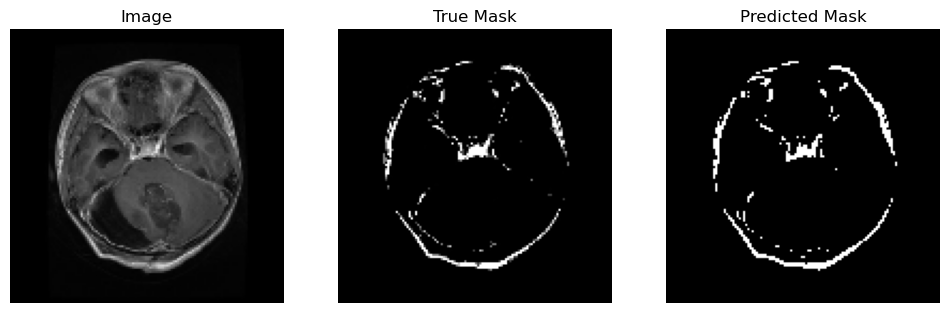

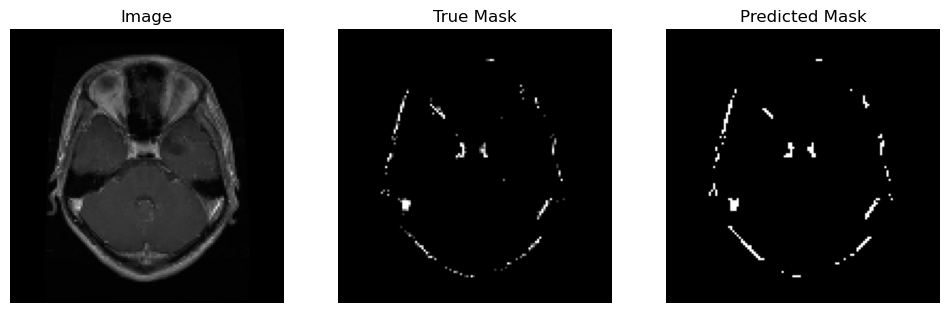

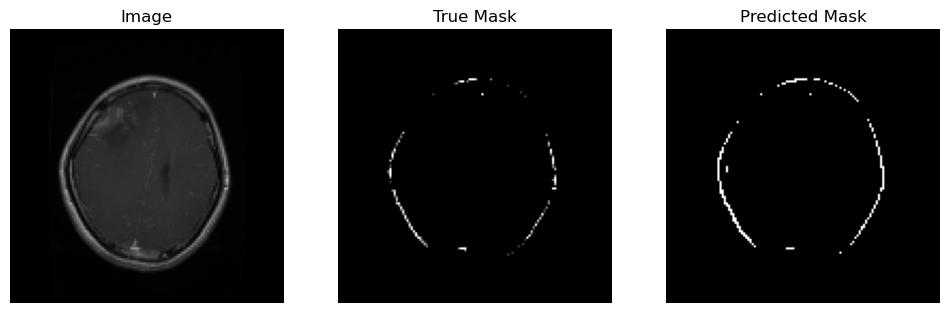

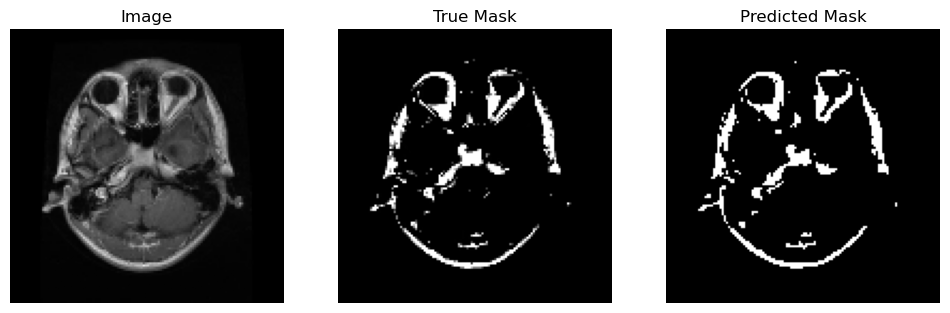

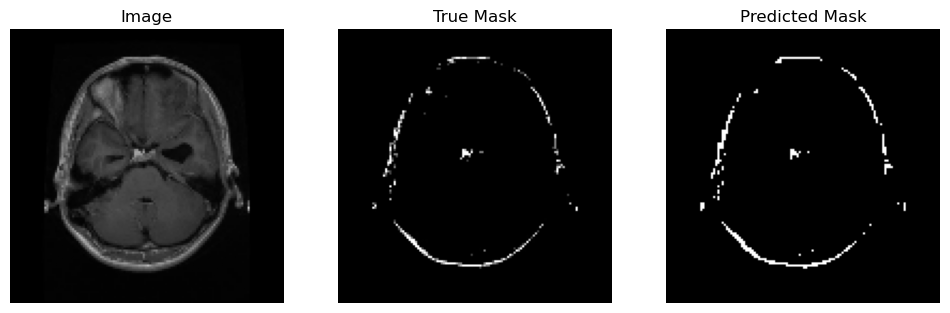

In [11]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
model = load_model('models/unet.h5')
def load_test_data_with_subdirs(image_dir, mask_dir):
    images = []
    masks = []
    for category in os.listdir(image_dir):
        category_image_dir = os.path.join(image_dir, category)
        category_mask_dir = os.path.join(mask_dir, category)
        
        if not os.path.isdir(category_image_dir):
            continue
        
        for filename in os.listdir(category_image_dir):
            if filename.lower().endswith('.jpg'):
                image_path = os.path.join(category_image_dir, filename)
                mask_path = os.path.join(category_mask_dir, filename)
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image: {image_path}")
                    continue
                image = cv2.resize(image, (128, 128)) / 255.0
                images.append(image)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Failed to load mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, (128, 128)) / 255.0
                masks.append(mask)
     
    images = np.array(images, dtype='float32')
    masks = np.array(masks, dtype='float32')
    masks = np.expand_dims(masks, axis=-1)
    return images, masks
image_dir = 'testing'
mask_dir = 'testing_masks'
test_images, test_masks = load_test_data_with_subdirs(image_dir, mask_dir)
print(f"Loaded {len(test_images)} test images and {len(test_masks)} masks.")
predicted_masks = model.predict(test_images)
predicted_masks = (predicted_masks > 0.5).astype(np.uint8)
true_masks_flat = (test_masks > 0.5).astype(np.uint8).flatten()
predicted_masks_flat = predicted_masks.flatten
accuracy = accuracy_score(true_masks_flat, predicted_masks_flat)
precision = precision_score(true_masks_flat, predicted_masks_flat, average='binary')
recall = recall_score(true_masks_flat, predicted_masks_flat, average='binary')
f1 = f1_score(true_masks_flat, predicted_masks_flat, average='binary')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i])
    plt.title("Image")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(test_masks[i].squeeze(), cmap='gray')
    plt.title("True Mask")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')
    
    plt.show()


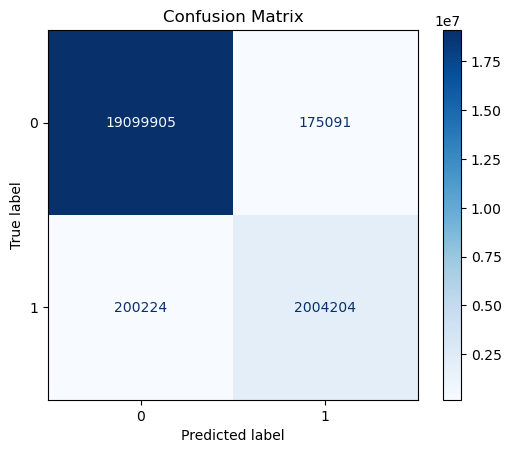

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(true_masks_flat, predicted_masks_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
